# **Random Forest(RF) on IoT Combined Dataset**

****Importing libraries****

In [13]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
#warnings.filterwarnings('always') 

**Upload File**

In [14]:
#uploaded = files.upload()

**Importing the Dataset**

In [15]:
import pandas as pd

dataset = pd.read_csv('Processed_Combined_IoT_dataset.csv')

**Exploratory Data Analysis**

In [16]:
dataset.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status,label
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0


In [17]:
print(dataset.shape)

(401119, 18)


In [18]:
print(list(dataset.columns))

['FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil', 'current_temperature', 'door_state', 'fridge_temperature', 'humidity', 'latitude', 'light_status', 'longitude', 'motion_status', 'pressure', 'sphone_signal', 'temp_condition', 'temperature', 'thermostat_status', 'label']


In [19]:
target_cols=list(dataset.columns[-1:])
target_cols

['label']

In [20]:
feature_cols= list(dataset.columns[:-1])
feature_cols

['FC1_Read_Input_Register',
 'FC2_Read_Discrete_Value',
 'FC3_Read_Holding_Register',
 'FC4_Read_Coil',
 'current_temperature',
 'door_state',
 'fridge_temperature',
 'humidity',
 'latitude',
 'light_status',
 'longitude',
 'motion_status',
 'pressure',
 'sphone_signal',
 'temp_condition',
 'temperature',
 'thermostat_status']

**Split Dataset**

In [21]:
#split dataset in features and target variable
X = dataset.drop('label', axis=1) # Features
y = dataset['label'] # Target variable

In [22]:
X.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1


In [23]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

**Splitting Data**

In [24]:
# Split dataset into training set and test set
train_x, test_x, train_Y, test_Y = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [25]:
# Check the shape of all of these
print("X_train shape is : ", train_x.shape)
print("X_test shape  is : ", test_x.shape)
print("y_train shape is : ", train_Y.shape)
print("y_test shape is  : ", test_Y.shape)

X_train shape is :  (280783, 17)
X_test shape  is :  (120336, 17)
y_train shape is :  (280783,)
y_test shape is  :  (120336,)


**Building Model**

In [26]:
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, cohen_kappa_score
from sklearn import metrics
import timeit

def performance_measures_and_classification_report(test_Y, pred_y, train_time, test_time):
    results = confusion_matrix(test_Y, pred_y)
    error = zero_one_loss(test_Y, pred_y)
    accuracy = accuracy_score(test_Y, pred_y)
    precision = precision_score(test_Y, pred_y, average='weighted')
    recall = recall_score(test_Y, pred_y, average='weighted')
    f1 = f1_score(test_Y, pred_y, average='weighted')
    mcc = matthews_corrcoef(test_Y, pred_y)
    cohens_kappa = cohen_kappa_score(test_Y, pred_y)

    print("Confusion matrix: ", results)
    
    print("Zero-one classification loss: ", error)
    print("Accuracy score: ", accuracy)
    print("Precision score: ", precision)
    print("Recall score: ", recall)
    print("F1 Score: ", f1)
    print("MCC: ", mcc)
    print("Cohens kappa:", cohens_kappa)
    print('Train Time(s): ',train_time) 
    print('Test Time(s): ',test_time)

    print("Classification Report : \n\n", metrics.classification_report(pred_y, test_Y))

In [27]:
import seaborn as sns
from matplotlib import pyplot as plt

def plot_confusion_matrix(test_Y,pred_y, name):
    con_metrix = confusion_matrix(y_true=test_Y,y_pred=pred_y)
    
    fig,ax = plt.subplots(figsize=(5,4))
    sns.heatmap(con_metrix,annot=True,cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.savefig(name)
    plt.show()

Confusion matrix:  [[69911  3584]
 [12071 34770]]
Zero-one classification loss:  0.13009406993750827
Accuracy score:  0.8699059300624917
Precision score:  0.873699913372861
Recall score:  0.8699059300624917
F1 Score:  0.8669767534402482
MCC:  0.7256791420330211
Cohens kappa: 0.7170933577216891
Train Time(s):  54.76885081
Test Time(s):  4.459366609000426
Classification Report : 

               precision    recall  f1-score   support

           0       0.95      0.85      0.90     81982
           1       0.74      0.91      0.82     38354

    accuracy                           0.87    120336
   macro avg       0.85      0.88      0.86    120336
weighted avg       0.88      0.87      0.87    120336



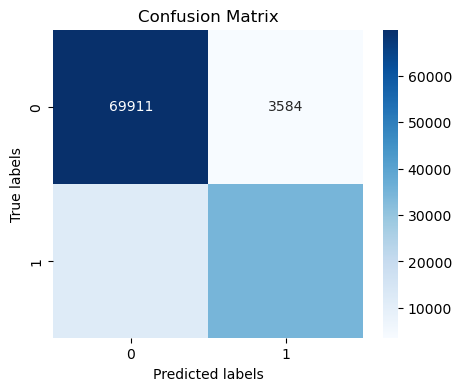

In [28]:
# 2-class classification version
# 1. Random Forest Classifier
#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train_x,train_Y)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

#Calculate start time
start = timeit.default_timer()

# Predict the model
pred_y=clf.predict(test_x)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

performance_measures_and_classification_report(test_Y, pred_y, train_time, test_time)

plot_confusion_matrix(test_Y,pred_y, 'random_forest_binary_class.png')

Confusion matrix:  [[69364  4131]
 [12143 34698]]
Zero-one classification loss:  0.13523800026592203
Accuracy score:  0.864761999734078
Precision score:  0.8675977531035642
Recall score:  0.864761999734078
F1 Score:  0.8619333619073722
MCC:  0.7139597795111047
Cohens kappa: 0.7064653029274728
Train Time(s):  2.931255551000504
Test Time(s):  0.06953512800100725
Classification Report : 

               precision    recall  f1-score   support

           0       0.94      0.85      0.90     81507
           1       0.74      0.89      0.81     38829

    accuracy                           0.86    120336
   macro avg       0.84      0.87      0.85    120336
weighted avg       0.88      0.86      0.87    120336



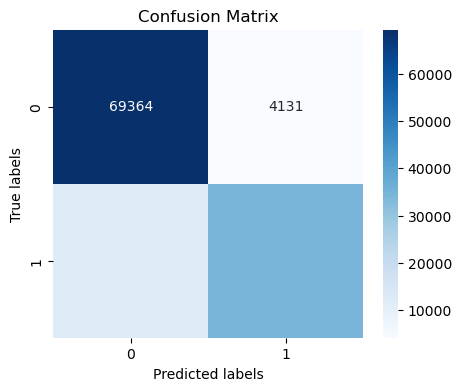

In [29]:
# 1. Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix, zero_one_loss

start = timeit.default_timer()

decision_tree_classifier = DecisionTreeClassifier(random_state=17)
decision_tree_classifier.fit(train_x, train_Y)

stop = timeit.default_timer()
train_time= stop - start

start = timeit.default_timer()

pred_y = decision_tree_classifier.predict(test_x)

stop = timeit.default_timer()
test_time= stop - start

performance_measures_and_classification_report(test_Y, pred_y, train_time, test_time)

plot_confusion_matrix(test_Y,pred_y, 'decision_tree_binary_class.png')

Confusion matrix:  [[68740  4755]
 [31360 15481]]
Zero-one classification loss:  0.3001180029251429
Accuracy score:  0.6998819970748571
Precision score:  0.7171953761601297
Recall score:  0.6998819970748571
F1 Score:  0.6633614330588607
MCC:  0.346515062618639
Cohens kappa: 0.2963221681287075
Train Time(s):  0.242888867000147
Test Time(s):  0.08678943700215314
Classification Report : 

               precision    recall  f1-score   support

           0       0.94      0.69      0.79    100100
           1       0.33      0.77      0.46     20236

    accuracy                           0.70    120336
   macro avg       0.63      0.73      0.63    120336
weighted avg       0.83      0.70      0.74    120336



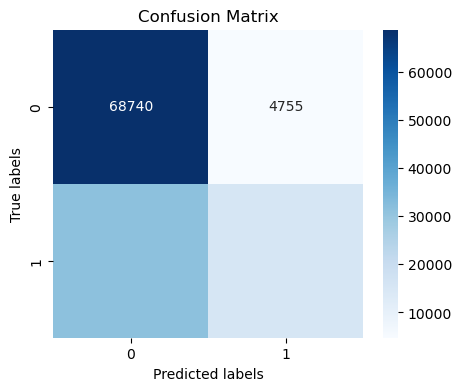

In [30]:
# 2. Naïve Bayes Classifier
from sklearn.naive_bayes import GaussianNB 

start = timeit.default_timer()

naive_bayes_classifier = GaussianNB().fit(train_x, train_Y) 

stop = timeit.default_timer()
train_time= stop - start

start = timeit.default_timer()

pred_y = naive_bayes_classifier.predict(test_x)

stop = timeit.default_timer()
test_time= stop - start

performance_measures_and_classification_report(test_Y, pred_y, train_time, test_time)

plot_confusion_matrix(test_Y,pred_y, 'naïve_bayes_binary_class.png')

Confusion matrix:  [[71660  1835]
 [35710 11131]]
Zero-one classification loss:  0.31200139609094535
Accuracy score:  0.6879986039090547
Precision score:  0.7417838537302298
Recall score:  0.6879986039090547
F1 Score:  0.628857042079456
MCC:  0.33442256864487246
Cohens kappa: 0.2447637858205809
Train Time(s):  5.661630051999964
Test Time(s):  0.03441932399800862
Classification Report : 

               precision    recall  f1-score   support

           0       0.98      0.67      0.79    107370
           1       0.24      0.86      0.37     12966

    accuracy                           0.69    120336
   macro avg       0.61      0.76      0.58    120336
weighted avg       0.90      0.69      0.75    120336



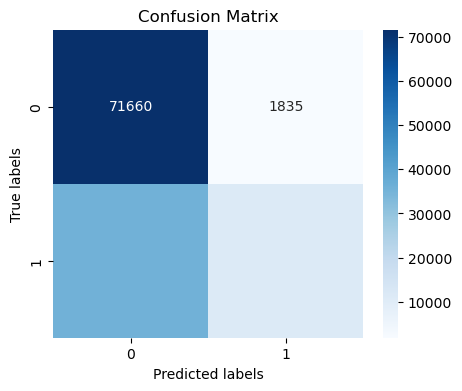

In [31]:
# 3. Logistic Regression
from sklearn.linear_model import LogisticRegression

start = timeit.default_timer()

logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(train_x, train_Y)

stop = timeit.default_timer()
train_time= stop - start

start = timeit.default_timer()

pred_y = logistic_regression.predict(test_x)

stop = timeit.default_timer()
test_time= stop - start

performance_measures_and_classification_report(test_Y, pred_y, train_time, test_time)

plot_confusion_matrix(test_Y,pred_y, 'logistic_regression_binary_class.png')

In [ ]:
# 4. SVM (Support Vector Machine) Classifier
from sklearn.svm import SVC 

start = timeit.default_timer()

svm_linear_classifier = SVC(kernel = 'linear', C = 1)
svm_linear_classifier.fit(train_x, train_Y) 


stop = timeit.default_timer()
train_time= stop - start

start = timeit.default_timer()

pred_y = svm_linear_classifier.predict(test_x) 

stop = timeit.default_timer()
test_time= stop - start

performance_measures_and_classification_report(test_Y, pred_y, train_time, test_time)

plot_confusion_matrix(test_Y,pred_y, 'svm_binary_class.png')

Confusion matrix:  [[69193  4302]
 [15828 31013]]
Zero-one classification loss:  0.16728161148783405
Accuracy score:  0.832718388512166
Precision score:  0.8388817417711854
Recall score:  0.832718388512166
F1 Score:  0.8270657612099115
MCC:  0.6462745598772887
Cohens kappa: 0.631744590072167
Train Time(s):  0.10001727800045046
Test Time(s):  36.77710230199955
Classification Report : 

               precision    recall  f1-score   support

           0       0.94      0.81      0.87     85021
           1       0.66      0.88      0.75     35315

    accuracy                           0.83    120336
   macro avg       0.80      0.85      0.81    120336
weighted avg       0.86      0.83      0.84    120336



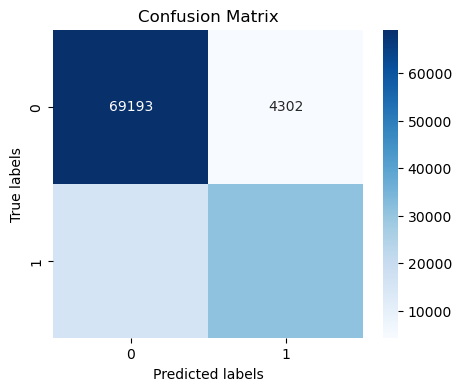

In [32]:
# 5. KNN (k-Nearest Neighbors) Classifier
from sklearn.neighbors import KNeighborsClassifier 

start = timeit.default_timer()

knn_classifier = KNeighborsClassifier(n_neighbors = 7)
knn_classifier.fit(train_x, train_Y) 

stop = timeit.default_timer()
train_time= stop - start

start = timeit.default_timer()

pred_y = knn_classifier.predict(test_x) 

stop = timeit.default_timer()
test_time= stop - start

performance_measures_and_classification_report(test_Y, pred_y, train_time, test_time)

plot_confusion_matrix(test_Y,pred_y, 'knn_binary_class.png')

In [33]:
!pip install tensorflow

In [34]:
print(train_x.shape)

(280783, 17)


2024-04-25 11:23:04.272324: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
8775/8775 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.7175 - loss: 0.5626 - val_accuracy: 0.7770 - val_loss: 0.4654
Epoch 2/10
8775/8775 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7892 - loss: 0.4484 - val_accuracy: 0.7913 - val_loss: 0.4298
Epoch 3/10
8775/8775 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7930 - loss: 0.4300 - val_accuracy: 0.7951 - val_loss: 0.4275
Epoch 4/10
8775/8775 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7961 - loss: 0.4236 - val_accuracy: 0.7983 - val_loss: 0.4186
Epoch 5/10
8775/8775 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7953 - loss: 0.4219 - val_accuracy: 0.7989 - val_loss: 0.4173
Epoch 6/10
8775/8775 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.7974 - loss: 0.4197 - val_accuracy: 0.7970 - val_loss: 0.4166
Epoch 7/10
8775/8775 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7960 - loss: 0.4198 - val_accuracy: 0.7963 - val_loss: 0.4149
Epoch 8/10
8775/8775 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - accuracy: 0.7959 - loss: 0

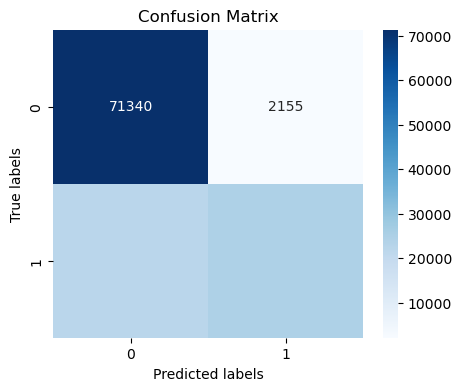

In [35]:
# 6. Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder

start = timeit.default_timer()

model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(17,)),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(train_x, train_Y, epochs=10, validation_data=(test_x, test_Y))

stop = timeit.default_timer()
train_time= stop - start

start = timeit.default_timer()

pred_y = model.predict(test_x)

stop = timeit.default_timer()
test_time= stop - start

pred_y = (pred_y > 0.5).astype(int)

performance_measures_and_classification_report(test_Y, pred_y, train_time, test_time)

plot_confusion_matrix(test_Y,pred_y, 'keras_binary_class.png')

Confusion matrix:  [[69920  3575]
 [12060 34781]]
Zero-one classification loss:  0.12992786863449013
Accuracy score:  0.8700721313655099
Precision score:  0.8738729013172755
Recall score:  0.8700721313655099
F1 Score:  0.8671475837881542
MCC:  0.7260429239033553
Cohens kappa: 0.7174570461742344
Train Time(s):  521.8054091459999
Test Time(s):  26.578860886002076
Classification Report : 

               precision    recall  f1-score   support

           0       0.95      0.85      0.90     81980
           1       0.74      0.91      0.82     38356

    accuracy                           0.87    120336
   macro avg       0.85      0.88      0.86    120336
weighted avg       0.88      0.87      0.87    120336



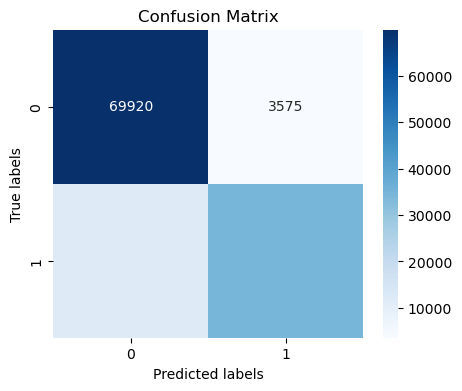

In [36]:
# 7. Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

start = timeit.default_timer()

rf_classifier = RandomForestClassifier(n_estimators = 1000, random_state=10)
rf_classifier.fit(train_x, train_Y)

stop = timeit.default_timer()
train_time= stop - start

start = timeit.default_timer()

pred_y = rf_classifier.predict(test_x)

stop = timeit.default_timer()
test_time= stop - start

performance_measures_and_classification_report(test_Y, pred_y, train_time, test_time)

plot_confusion_matrix(test_Y,pred_y, 'random_forest_binary_class.png')